# Unsupervised Learning with Python
# 1- Clustering algorithms

![img1](images/clustering.gif)
![img2](images/clustering2.png)


# Density-based spatial clustering of applications with noise (DBSCAN) 

![img3](images/dbscan1.png)
![img4](images/dbscan2.jpg)
![img6](images/dbscanalg.jpg)
![img5](images/dbscanalg2.jpg)


Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


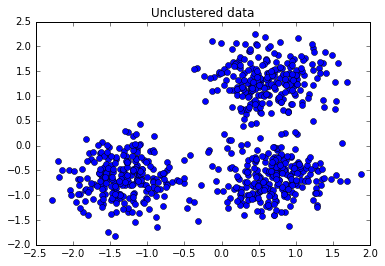

/home/mad/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


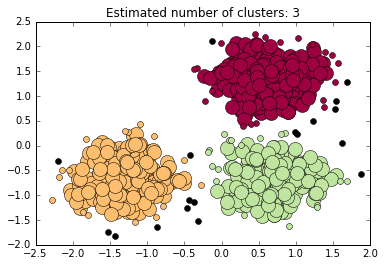

In [1]:
# Import the libraries: DBSCAN for clustering, make_blobs to create data, and StandardScaler to scale it.
print(__doc__)
import numpy as np
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# Scale the data to the same order of magnitude
X = StandardScaler().fit_transform(X)

##############################################################################
# Create and fit a DBSCAN model
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Print the results
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



##############################################################################
# Plot results
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.show()
plt.plot(X[:, 0], X[:, 1], 'o', markersize=6)
plt.title('Unclustered data')
plt.show()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## The main problem of DBSCAN: different density clusters, thus HDBSCAN

# Hierarchical Density-Based Spatial Clustering of Applications with Noise

**HDBSCAN** - Hierarchical Density-Based Spatial Clustering of Applications with Noise. Performs DBSCAN over varying epsilon values and integrates the result to find a clustering that gives the best stability over epsilon. This allows HDBSCAN to find clusters of varying densities (unlike DBSCAN), and be more robust to parameter selection.

In practice this means that HDBSCAN returns a good clustering straight away with little or no parameter tuning -- and the primary parameter, minimum cluster size, is intuitive and easy to select.

HDBSCAN is ideal for exploratory data analysis; it's a fast and robust algorithm that you can trust to return meaningful clusters (if there are any).

Based on the paper:
R. Campello, D. Moulavi, and J. Sander, Density-Based Clustering Based on Hierarchical Density Estimates In: Advances in Knowledge Discovery and Data Mining, Springer, pp 160-172. 2013

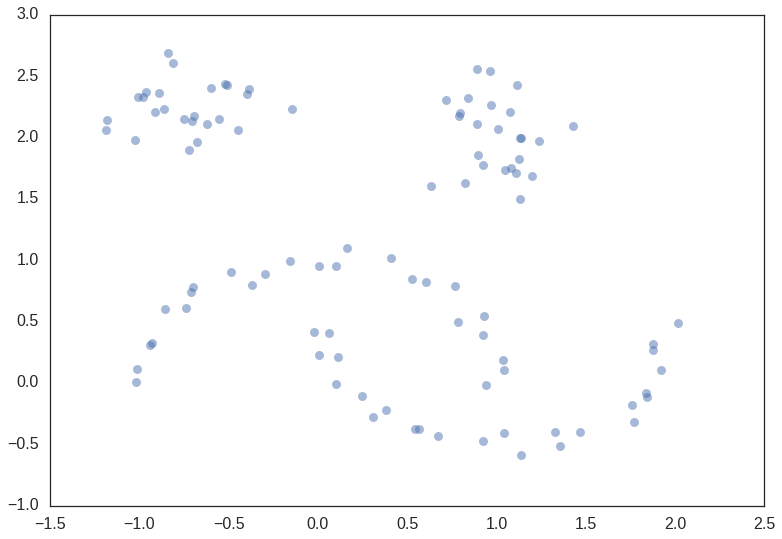

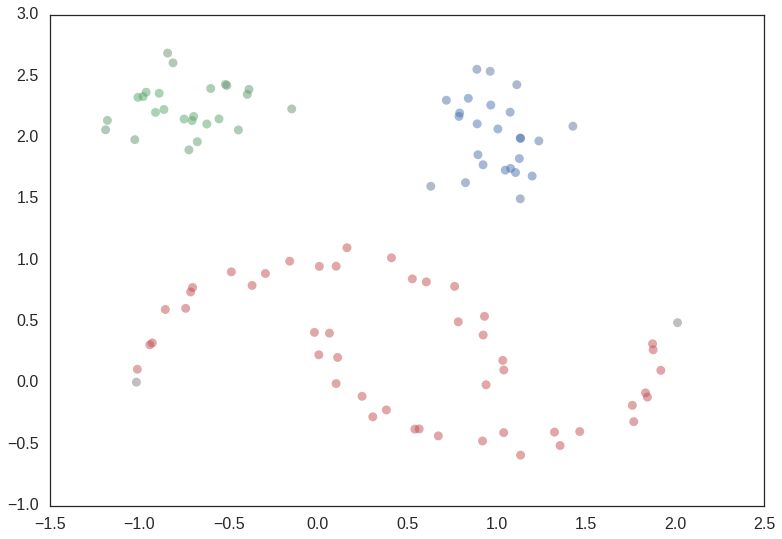

In [2]:
# Import libraries and set graphs style
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

# Create data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])

# Plot unclustered data 
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
plt.show()

# Define and fit HDBscan Model
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

# Plot clustered data
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.show()

## For more informations check:
"How HDBSCAN Works.ipynb"  and  "Comparing Clustering Algorithms.ipynb"


# 2- Dimentionality reduction algorithms

# t-distributed stochastic neighbor embedding (t-SNE)

t-SNE is a dimentionality reduction algorithm that models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points. This allows for an easy and intuitive graphical representation of your data, and thus to perform a better clustering.

![img8](images/m-SNE.png)

Automatically created module for IPython interactive environment


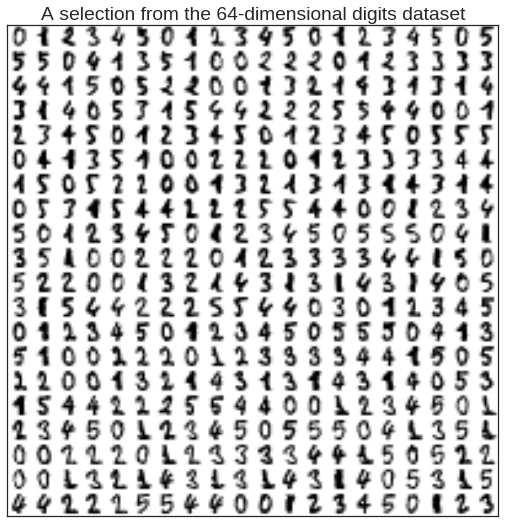

Computing random projection
Computing t-SNE embedding


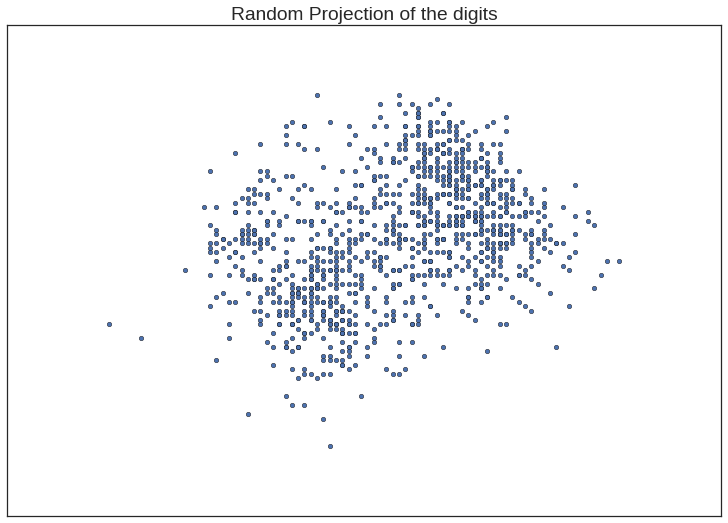

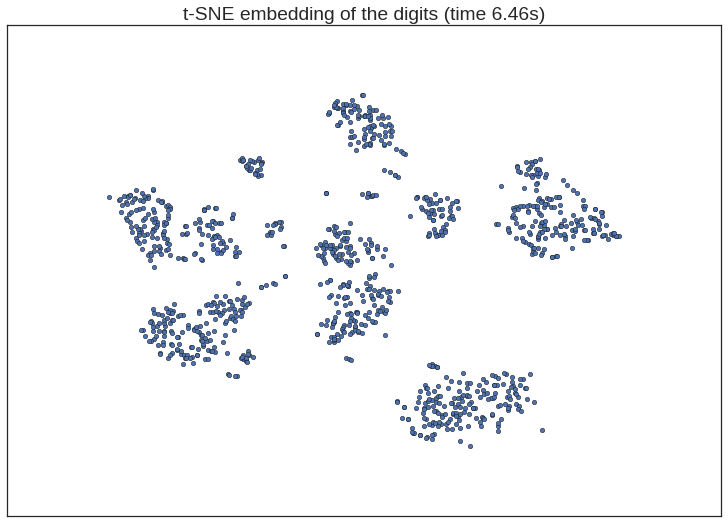

In [3]:
# Import libraries
print(__doc__)
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import hdbscan
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

# Import dataset
# Each X[i] is a long (64 elements for each digit) array with real elements indicating the brightness of one pixel in the image.
digits = datasets.load_digits(n_class=6)
X = digits.data

# y is the 'labels' set. You can use it with to train a supervised learning classification algorithm, or hide it to try unsupervised learning.
y = digits.target


n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
# This is just a simple plotting routine to be used later, it does not manipulate or learn from the data. Nothing to be done here.
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

 

#----------------------------------------------------------------------
# Plot images of the digits
# We are simply plotting the data (X) we have without any engineering.
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()
#----------------------------------------------------------------------



# Random 2D projection using a random unitary matrix
# Now the fun begins. This part will project our 64 component arrays on visualisable **random** 2-components arrays.
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=1732)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
# Now we do the same but with t-SNE instead of random 2 components vectors.
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Computing t-SNE embedding


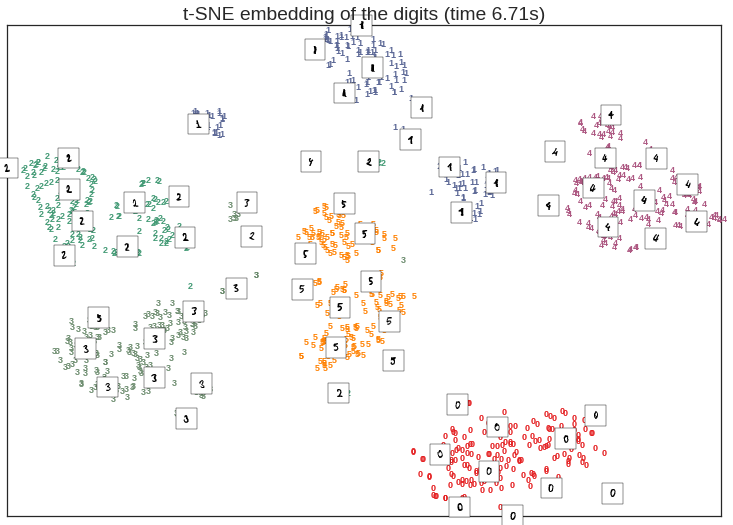

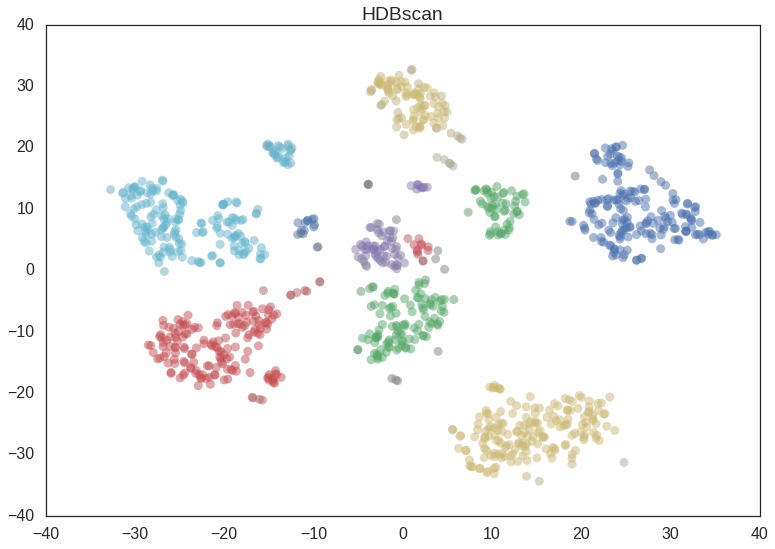

In [4]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
# This is just a simple plotting routine to be used later, it does not manipulate or learn from the data. Nothing to be done here.

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()

    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

        
# Using the labels for comparison


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
# Now we do the same but with t-SNE instead of random 2 components vectors.
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()



#----------------------------------------------------------------------
# HDBScan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X_tsne)

palette = sns.color_palette(n_colors=15)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_colors, **plot_kwds)
plt.title('HDBscan')

plt.show()

